<a href="https://colab.research.google.com/github/sebasDev2001/AI-and-Data-Science-Journey/blob/main/Fuzzy_Washing_Machine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Fuzzy washing machine**

The objective was to simulate the work of a washing machine given intial conditions. This was obtained from a pattent which can be looked at below in the last lines of these notebooks.

In [ ]:
!pip install scikit-fuzzy


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import skfuzzy as fuzz
import skfuzzy.control as ctrl

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


* Variables Fuzzy y Conjuntos Borrosos

* The input TIME0
is determined as the total time from the beginning of a dryer
cycle to a point in time when the load moisture Sensor has
not registered 25 to 27 wet hits (i.e., valid wet hits) o

* The
value NUM25 27 is determined by the sum of total of valid
wet hits (i.e., 25 to 27 moisture indication per 150 millisec
ond period) occurring during the five minute period divided
by the number 8.

* During the 135
millisecond Sense period, the controller 35 Samples input
from the moisture sensor 52 every 5 milliseconds for a
maximum count of 27 indications of moisture in the clothes
load (also referred to as “wet hits”). The controller 35
assigns a digital value of 1 to a “wet hit’ measurement and
a value of 0 when a wet hit is not registered during a Sample
time

* Outputs from the fuzzy logic control portion  include Signals to add aditional time required to reach a dry State or aditional time required to reach a dampdry(humedo) State. The outputs are labeled ADDDAMPTIME and ADDDRYTIME.

###Inicializacion

In [ ]:
universe_drytime = np.arange(0, 25.1, 0.1) #salida
universe_damptime = np.arange(0,5.1,0.1) #salida
universe_2527 = np.arange(0,255.1,0.1) #entrada
universe_time0 = np.arange(0,255.1,0.1) # entrada

In [ ]:
v_time0 = ['vs','s','m','l','vl']
v_2527 = ['vs','s','m','l','vl']
v_drytime = ['Min5', 'Min12', 'Min15', 'Min18', 'Min20', 'Min22', 'Min25']
v_damptime = ['Min0','Min3','Min5']


In [ ]:
time0_vs = fuzz.membership.trapmf(universe_time0, [0,0,16,24])
time0_s = fuzz.membership.trimf(universe_time0, [16,24,32])
time0_m = fuzz.membership.trimf(universe_time0, [24,32,44])
time0_l = fuzz.membership.trapmf(universe_time0, [32,44,52,64])
time0_vl = fuzz.membership.trapmf(universe_time0, [52,64,255,255])
fuzz_time0 = [time0_vs,time0_s,time0_m,time0_l,time0_vl]

In [ ]:
Num2527_vs = fuzz.membership.trapmf(universe_2527, [0,0,5,15])
Num2527_s = fuzz.membership.trimf(universe_2527, [5,15,24])
Num2527_m = fuzz.membership.trapmf(universe_2527, [15,24,40,50])
Num2527_l = fuzz.membership.trapmf(universe_2527, [40,50,125,140])
Num2527_vl = fuzz.membership.trapmf(universe_2527, [115,140,255,255])
fuzz_Num2527 = [Num2527_vs,Num2527_s,Num2527_m,Num2527_l,Num2527_vl] 

In [ ]:
drytime_Min5 = fuzz.membership.trimf(universe_drytime, [0,5,12])
drytime_Min12 = fuzz.membership.trimf(universe_drytime, [5,12,15])
drytime_Min15 = fuzz.membership.trimf(universe_drytime, [12,15,18])
drytime_Min18 = fuzz.membership.trimf(universe_drytime, [15,18,20])
drytime_Min20 = fuzz.membership.trimf(universe_drytime, [18,20,22])
drytime_Min22 = fuzz.membership.trimf(universe_drytime, [20,22,25])
drytime_Min25 = fuzz.membership.trimf(universe_drytime, [22,25,25])
fuzz_drytime =[drytime_Min5,drytime_Min12,drytime_Min15,drytime_Min18,drytime_Min20,drytime_Min22,drytime_Min25]

In [ ]:
damptime_Min0 = fuzz.membership.trimf(universe_damptime, [0,0,3])
damptime_Min3 = fuzz.membership.trimf(universe_damptime, [1,3,5])
damptime_Min5 = fuzz.membership.trimf(universe_damptime, [3,5,5])
fuzz_damptime = [damptime_Min0,damptime_Min3,damptime_Min5]

In [ ]:
def plot_membfunction(universe, fuzzysets, namesfuzzysets,largo, ancho,namevariable=''):
  plt.figure(figsize=(largo,ancho))
  for fset,n in zip (fuzzysets,namesfuzzysets):
    plt.plot(universe,fset,label=n)
  plt.xlabel(namevariable)
  plt.ylabel('Membresía')
  plt.show()

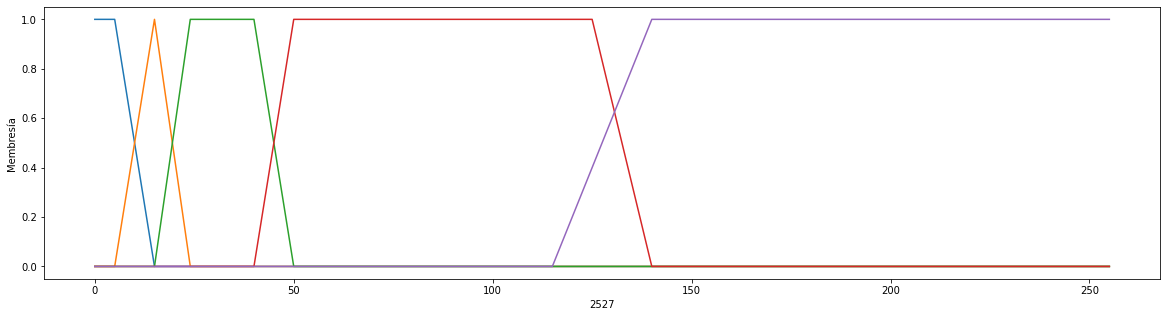

In [ ]:
plot_membfunction(universe_2527, fuzz_Num2527, v_2527,20,5, '2527')

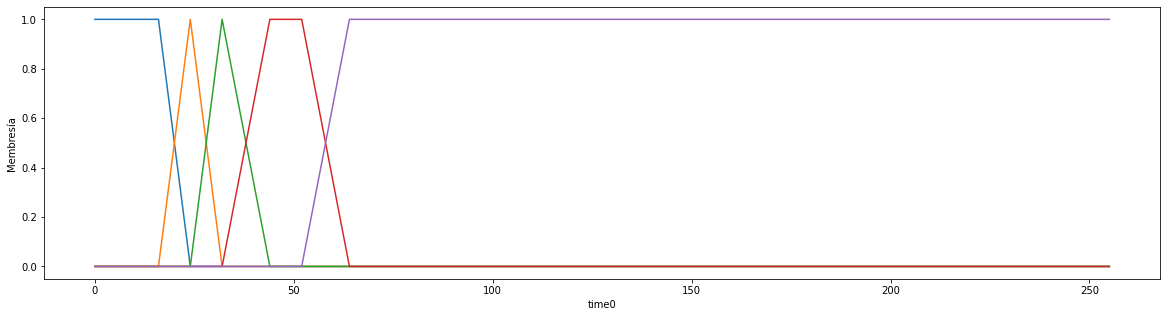

In [ ]:
plot_membfunction(universe_time0, fuzz_time0, v_time0,20,5, 'time0')

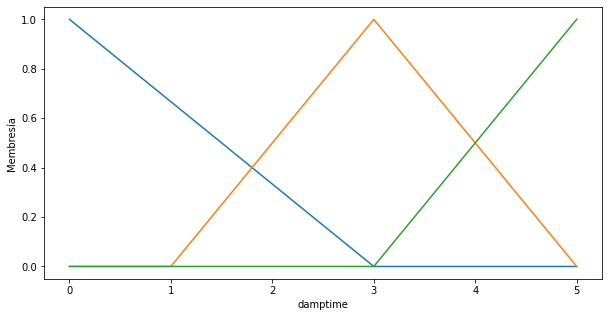

In [ ]:
plot_membfunction(universe_damptime, fuzz_damptime, v_damptime,10,5, 'damptime')

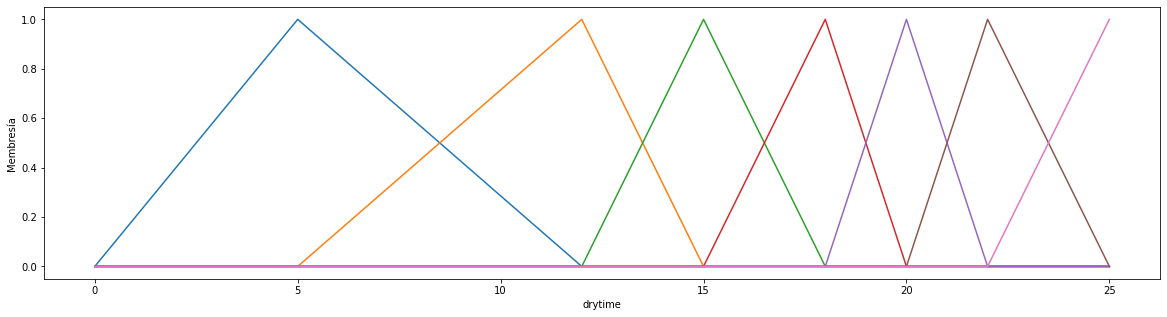

In [ ]:
plot_membfunction(universe_drytime, fuzz_drytime, v_drytime,20,5, 'drytime')

###Ciclo Normal

**Tabla para ciclo normal (drytime/damptime)**
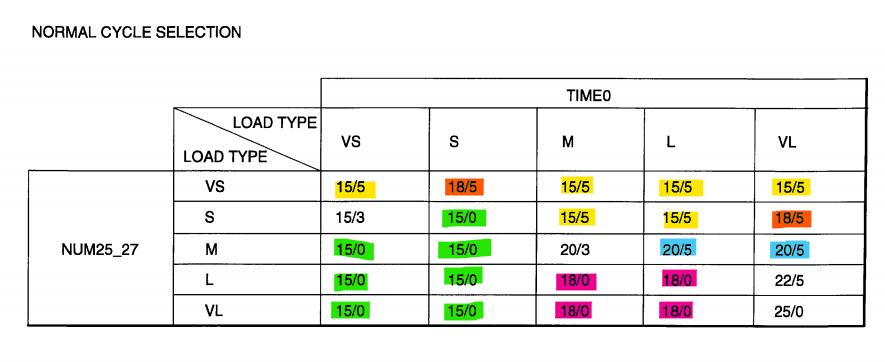

In [ ]:
get_centroid(24,25,1, 'lom', 1)

NameError: ignored

In [ ]:

def calcularMembership(time0, num2527):
  mf_time0 = [fuzz.interp_membership(universe_time0,x,time0) for x in fuzz_time0]
  mf_num2527 = [fuzz.interp_membership(universe_2527,y,num2527) for y in fuzz_Num2527]
  print(mf_time0)
  print(mf_num2527)  
  return mf_time0,mf_num2527




In [ ]:
def rule1_Normal(mf_time0,mf_num2527):
  print('Rule1: 15/0')
  rule1_ant1 = np.fmin(mf_time0[v_time0.index('vs')],mf_num2527[v_2527.index('m')])
  rule1_ant2 = np.fmin(mf_time0[v_time0.index('vs')],mf_num2527[v_2527.index('l')])
  rule1_ant3 = np.fmin(mf_time0[v_time0.index('vs')],mf_num2527[v_2527.index('vl')])
  rule1_ant4 = np.fmin(mf_time0[v_time0.index('s')],mf_num2527[v_2527.index('s')])
  rule1_ant5 = np.fmin(mf_time0[v_time0.index('s')],mf_num2527[v_2527.index('m')])
  rule1_ant6 = np.fmin(mf_time0[v_time0.index('s')],mf_num2527[v_2527.index('l')])
  rule1_ant7 = np.fmin(mf_time0[v_time0.index('s')],mf_num2527[v_2527.index('vl')])
  rule1_ant = np.max([rule1_ant1,rule1_ant2,rule1_ant3,rule1_ant4,rule1_ant5,rule1_ant6,rule1_ant7])
  act_drytime_rule1 = np.fmin(rule1_ant,drytime_Min15)
  act_damptime_rule1 = np.fmin(rule1_ant,damptime_Min0)
  print(rule1_ant)
  '''
  plt.figure()
  plt.plot(act_damptime_rule1)
  plt.plot(act_drytime_rule1)
  plt.show()
  '''
  return act_drytime_rule1,act_damptime_rule1

def rule2_Normal(mf_time0,mf_num2527):
  print('Rule2: 15/5')
  rule2_ant1 = np.fmin(mf_time0[v_time0.index('m')],mf_num2527[v_2527.index('vs')])
  rule2_ant2 = np.fmin(mf_time0[v_time0.index('m')],mf_num2527[v_2527.index('s')])
  rule2_ant3 = np.fmin(mf_time0[v_time0.index('l')],mf_num2527[v_2527.index('vs')])
  rule2_ant4 = np.fmin(mf_time0[v_time0.index('l')],mf_num2527[v_2527.index('s')])
  rule2_ant5 = np.fmin(mf_time0[v_time0.index('vl')],mf_num2527[v_2527.index('vs')])
  rule2_ant6 = np.fmin(mf_time0[v_time0.index('vs')],mf_num2527[v_2527.index('vs')])
  rule2_ant = np.max([rule2_ant1,rule2_ant2,rule2_ant3,rule2_ant4,rule2_ant5,rule2_ant6])
  act_drytime_rule2 = np.fmin(rule2_ant,drytime_Min15)
  act_damptime_rule2 = np.fmin(rule2_ant,damptime_Min5)
  print(rule2_ant)
  '''
  plt.figure()
  plt.plot(act_damptime_rule2)
  plt.plot(act_drytime_rule2)
  plt.show()
  '''
  return act_drytime_rule2,act_damptime_rule2

def rule3_Normal(mf_time0,mf_num2527):
  print('Rule3: 18/0')
  rule3_ant1 = np.fmin(mf_time0[v_time0.index('m')],mf_num2527[v_2527.index('l')])
  rule3_ant2 = np.fmin(mf_time0[v_time0.index('m')],mf_num2527[v_2527.index('vl')])
  rule3_ant3 = np.fmin(mf_time0[v_time0.index('l')],mf_num2527[v_2527.index('l')])
  rule3_ant4 = np.fmin(mf_time0[v_time0.index('l')],mf_num2527[v_2527.index('vl')])
  rule3_ant = np.max([rule3_ant1,rule3_ant2,rule3_ant3,rule3_ant4])
  act_drytime_rule3 = np.fmin(rule3_ant,drytime_Min18)
  act_damptime_rule3 = np.fmin(rule3_ant,damptime_Min0)
  print(rule3_ant)
  '''
  plt.figure()
  plt.plot(act_damptime_rule3)
  plt.plot(act_drytime_rule3)
  plt.show()
  '''
  return act_drytime_rule3,act_damptime_rule3

def rule4_Normal(mf_time0,mf_num2527):
  print('Rule4: 20/5')
  rule4_ant1 = np.fmin(mf_time0[v_time0.index('l')],mf_num2527[v_2527.index('m')])
  rule4_ant2 = np.fmin(mf_time0[v_time0.index('vl')],mf_num2527[v_2527.index('m')])
  rule4_ant = np.max([rule4_ant1,rule4_ant2])
  act_drytime_rule4 = np.fmin(rule4_ant,drytime_Min20)
  act_damptime_rule4 = np.fmin(rule4_ant,damptime_Min5)
  print(rule4_ant)
  '''
  plt.figure()
  plt.plot(act_damptime_rule4)
  plt.plot(act_drytime_rule4)
  plt.show()
  '''
  return act_drytime_rule4,act_damptime_rule4

def rule5_Normal(mf_time0,mf_num2527):
  print('Rule5: 18/5')
  rule5_ant1 = np.fmin(mf_time0[v_time0.index('s')],mf_num2527[v_2527.index('vs')])
  rule5_ant2 = np.fmin(mf_time0[v_time0.index('vl')],mf_num2527[v_2527.index('s')])
  rule5_ant = np.max([rule5_ant1,rule5_ant2])
  act_drytime_rule5 = np.fmin(rule5_ant,drytime_Min18)
  act_damptime_rule5 = np.fmin(rule5_ant,damptime_Min5)
  print(rule5_ant)
  '''
  plt.figure()
  plt.plot(act_damptime_rule5)
  plt.plot(act_drytime_rule5)
  plt.show()
  '''
  return act_drytime_rule5,act_damptime_rule5

def rule6_Normal(mf_time0,mf_num2527):
  print('Rule6: 15/3')
  rule6_ant = np.fmin(mf_time0[v_time0.index('vs')],mf_num2527[v_2527.index('s')])
  act_drytime_rule6 = np.fmin(rule6_ant,drytime_Min15)
  act_damptime_rule6 = np.fmin(rule6_ant,damptime_Min3)
  print(rule6_ant)
  '''
  plt.figure()
  plt.plot(act_damptime_rule6)
  plt.plot(act_drytime_rule6)
  plt.show()
  '''
  return act_drytime_rule6,act_damptime_rule6

def rule7_Normal(mf_time0,mf_num2527):
  print('Rule7: 20/3')
  rule7_ant = np.fmin(mf_time0[v_time0.index('m')],mf_num2527[v_2527.index('m')])
  act_drytime_rule7 = np.fmin(rule7_ant,drytime_Min20)
  act_damptime_rule7 = np.fmin(rule7_ant,damptime_Min3)
  print(rule7_ant)
  '''
  plt.figure()
  plt.plot(act_damptime_rule7)
  plt.plot(act_drytime_rule7)
  plt.show()
  '''
  return act_drytime_rule7,act_damptime_rule7

def rule8_Normal(mf_time0,mf_num2527):
  print('Rule8: 25/5')
  rule8_ant = np.fmin(mf_time0[v_time0.index('vl')],mf_num2527[v_2527.index('l')])
  act_drytime_rule8 = np.fmin(rule8_ant,drytime_Min22)
  act_damptime_rule8 = np.fmin(rule8_ant,damptime_Min5)
  print(rule8_ant)
  '''
  plt.figure()
  plt.plot(act_damptime_rule8)
  plt.plot(act_drytime_rule8)
  plt.show()
  '''
  return act_drytime_rule8,act_damptime_rule8

def rule9_Normal(mf_time0,mf_num2527):
  print('Rule9: 25/0')
  rule9_ant = np.fmin(mf_time0[v_time0.index('vl')],mf_num2527[v_2527.index('vl')])
  act_drytime_rule9 = np.fmin(rule9_ant,drytime_Min25)
  act_damptime_rule9 = np.fmin(rule9_ant,damptime_Min0)
  print(rule9_ant)
  '''
  plt.figure()
  plt.plot(act_damptime_rule9)
  plt.plot(act_drytime_rule9)
  plt.show()
  '''
  return act_drytime_rule9,act_damptime_rule9

def rules_Normal(mf_time0,mf_num2527):
  act_drytime_rule1,act_damptime_rule1 = rule1_Normal(mf_time0,mf_num2527)
  act_drytime_rule2,act_damptime_rule2 = rule2_Normal(mf_time0,mf_num2527)
  act_drytime_rule3,act_damptime_rule3 = rule3_Normal(mf_time0,mf_num2527)
  act_drytime_rule4,act_damptime_rule4 = rule4_Normal(mf_time0,mf_num2527)
  act_drytime_rule5,act_damptime_rule5 = rule5_Normal(mf_time0,mf_num2527)
  act_drytime_rule6,act_damptime_rule6 = rule6_Normal(mf_time0,mf_num2527)
  act_drytime_rule7,act_damptime_rule7 = rule7_Normal(mf_time0,mf_num2527)
  act_drytime_rule8,act_damptime_rule8 = rule8_Normal(mf_time0,mf_num2527)
  act_drytime_rule9,act_damptime_rule9 = rule9_Normal(mf_time0,mf_num2527)
  return [[act_damptime_rule1,act_damptime_rule2,act_damptime_rule3,act_damptime_rule4,act_damptime_rule5,act_damptime_rule6,act_damptime_rule7,act_damptime_rule8,
          act_damptime_rule9],[act_drytime_rule1,act_drytime_rule2,act_drytime_rule3,act_drytime_rule4,act_drytime_rule5,act_drytime_rule6,act_drytime_rule7,act_drytime_rule8,act_drytime_rule9]]

In [ ]:
def union_Normal(mf_time0,mf_num2527):
  rules_N = rules_Normal(mf_time0,mf_num2527)
  y_final = []
  union_final = []
  x = [universe_damptime,universe_drytime]
  j = 0
  for i in rules_N:
    yr1_r2,unionr1_r2 = fuzz.fuzzy_or(x[j],i[0],x[j],i[1])
    y_r3,union_r3 = fuzz.fuzzy_or(x[j],unionr1_r2,x[j],i[2])
    y_r4,union_r4 = fuzz.fuzzy_or(x[j],union_r3,x[j],i[3])
    y_r5,union_r5 = fuzz.fuzzy_or(x[j],union_r4,x[j],i[4])
    y_r6,union_r6 = fuzz.fuzzy_or(x[j],union_r5,x[j],i[5])
    y_r7,union_r7 = fuzz.fuzzy_or(x[j],union_r6,x[j],i[6])
    y_r8,union_r8 = fuzz.fuzzy_or(x[j],union_r7,x[j],i[7])
    y,union = fuzz.fuzzy_or(x[j],union_r8,x[j],i[8])
    #plt.figure()
    #plt.plot(union)
    #y_final.append(y)
    j+=1
    union_final.append(union)
  return union_final[0],union_final[1]

In [ ]:
def graph(union_damptime,union_drytime):
  x = universe_damptime
  plt.figure(figsize=(10,5))
  plt.plot(x,damptime_Min0,'k',linestyle='dashed')
  plt.plot(x,damptime_Min3,'k',linestyle='dashed')
  plt.plot(x,damptime_Min5,'k',linestyle='dashed')
  plt.plot(x,union_damptime,'r')
  y = universe_drytime
  plt.figure(figsize=(10,5))
  plt.plot(y,drytime_Min5,'k',linestyle='dashed')
  plt.plot(y,drytime_Min12,'k',linestyle='dashed')
  plt.plot(y,drytime_Min15,'k',linestyle='dashed')
  plt.plot(y,drytime_Min18,'k',linestyle='dashed')
  plt.plot(y,drytime_Min20,'k',linestyle='dashed')
  plt.plot(y,drytime_Min22,'k',linestyle='dashed')
  plt.plot(y,drytime_Min25,'k',linestyle='dashed')
  plt.plot(y,union_drytime,'r')

In [ ]:
def get_centroid_Normal(mf_time0,mf_num2527,mode, graficas):
  union_damptime,union_drytime = union_Normal(mf_time0,mf_num2527)
  #graph_Normal(union_damptime,union_drytime)
  union = [union_damptime,union_drytime]
  x = [universe_damptime,universe_drytime]
  name = ['DampTime','DryTime']
  defuzz_centroids = []
  for i in range(0,2):
    print(name[i])
    defuzz_centroid = fuzz.defuzz(x[i],union[i],mode)
    defuzz_centroids.append(defuzz_centroid)
    ymax = fuzz.interp_membership(x[i],union[i],defuzz_centroid)
    print(mode,": ",defuzz_centroid)
    print("Ymax: ",ymax)
    if graficas:
      plt.figure(figsize=(10,5))
      plt.plot(x[i],union[i],'r')
      plt.vlines(defuzz_centroid,0,ymax,color = 'b')
      plt.ylabel('Membresia')
      plt.xlabel(name[i])
      plt.ylim(0,1.1)

  return defuzz_centroids


###Ciclo Heavy

**Tabla para ciclo Cotton/Towels (Heavy) (drytime/damptime)**
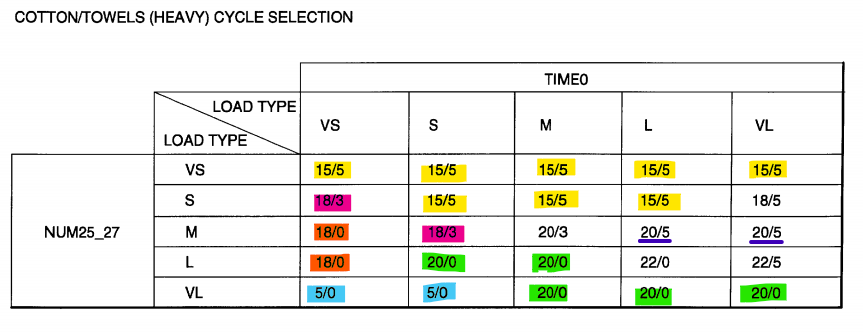

In [ ]:
def rule1_Heavy(mf_time0,mf_num2527):
  print('Rule1: 15/5')
  rule1_ant1 = np.fmin(mf_time0[v_time0.index('vs')],mf_num2527[v_2527.index('vs')])
  rule1_ant2 = np.fmin(mf_time0[v_time0.index('s')],mf_num2527[v_2527.index('vs')])
  rule1_ant3 = np.fmin(mf_time0[v_time0.index('s')],mf_num2527[v_2527.index('s')])
  rule1_ant4 = np.fmin(mf_time0[v_time0.index('m')],mf_num2527[v_2527.index('vs')])
  rule1_ant5 = np.fmin(mf_time0[v_time0.index('m')],mf_num2527[v_2527.index('s')])
  rule1_ant6 = np.fmin(mf_time0[v_time0.index('l')],mf_num2527[v_2527.index('vs')])
  rule1_ant7 = np.fmin(mf_time0[v_time0.index('l')],mf_num2527[v_2527.index('s')])
  rule1_ant8 = np.fmin(mf_time0[v_time0.index('vl')],mf_num2527[v_2527.index('vs')])
  rule1_ant = np.max([rule1_ant1,rule1_ant2,rule1_ant3,rule1_ant4,rule1_ant5,rule1_ant6,rule1_ant7,rule1_ant8])
  act_drytime_rule1 = np.fmin(rule1_ant,drytime_Min15)
  act_damptime_rule1 = np.fmin(rule1_ant,damptime_Min5)
  print(rule1_ant)
  '''
  plt.figure()
  plt.plot(act_damptime_rule1)
  plt.plot(act_drytime_rule1)
  plt.show()
  '''
  return act_drytime_rule1,act_damptime_rule1

def rule2_Heavy(mf_time0,mf_num2527):
  print('Rule2: 20/0')
  rule2_ant1 = np.fmin(mf_time0[v_time0.index('s')],mf_num2527[v_2527.index('l')])
  rule2_ant2 = np.fmin(mf_time0[v_time0.index('m')],mf_num2527[v_2527.index('l')])
  rule2_ant3 = np.fmin(mf_time0[v_time0.index('m')],mf_num2527[v_2527.index('vl')])
  rule2_ant4 = np.fmin(mf_time0[v_time0.index('l')],mf_num2527[v_2527.index('vl')])
  rule2_ant5 = np.fmin(mf_time0[v_time0.index('vl')],mf_num2527[v_2527.index('vl')])
  rule2_ant = np.max([rule2_ant1,rule2_ant2,rule2_ant3,rule2_ant4,rule2_ant5])
  act_drytime_rule2 = np.fmin(rule2_ant,drytime_Min20)
  act_damptime_rule2 = np.fmin(rule2_ant,damptime_Min0)
  print(rule2_ant)
  '''
  plt.figure()
  plt.plot(act_damptime_rule2)
  plt.plot(act_drytime_rule2)
  plt.show()
  '''
  return act_drytime_rule2,act_damptime_rule2

def rule3_Heavy(mf_time0,mf_num2527):
  print('Rule3: 18/3')
  rule3_ant1 = np.fmin(mf_time0[v_time0.index('vs')],mf_num2527[v_2527.index('s')])
  rule3_ant2 = np.fmin(mf_time0[v_time0.index('s')],mf_num2527[v_2527.index('m')])

  rule3_ant  = np.max([rule3_ant1,rule3_ant2])
  act_drytime_rule3 = np.fmin(rule3_ant,drytime_Min18)
  act_damptime_rule3 = np.fmin(rule3_ant,damptime_Min3)
  print(rule3_ant)
  '''
  plt.figure()
  plt.plot(act_damptime_rule3)
  plt.plot(act_drytime_rule3)
  plt.show()
  '''
  return act_drytime_rule3,act_damptime_rule3

def rule4_Heavy(mf_time0,mf_num2527):
  print('Rule4: 18/0')
  rule4_ant1 = np.fmin(mf_time0[v_time0.index('vs')],mf_num2527[v_2527.index('m')])
  rule4_ant1 = np.fmin(mf_time0[v_time0.index('vs')],mf_num2527[v_2527.index('l')])
  rule4_ant = np.max([rule4_ant1,rule4_ant1])
  act_drytime_rule4 = np.fmin(rule4_ant,drytime_Min18)
  act_damptime_rule4 = np.fmin(rule4_ant,damptime_Min0)
  print(rule4_ant)
  '''
  plt.figure()
  plt.plot(act_damptime_rule4)
  plt.plot(act_drytime_rule4)
  plt.show()
  '''
  return act_drytime_rule4,act_damptime_rule4

def rule5_Heavy(mf_time0,mf_num2527):
  print('Rule5: 5/0')
  rule5_ant1 = np.fmin(mf_time0[v_time0.index('vs')],mf_num2527[v_2527.index('vl')])
  rule5_ant2 = np.fmin(mf_time0[v_time0.index('s')],mf_num2527[v_2527.index('vl')])
  rule5_ant = np.max([rule5_ant1,rule5_ant2])
  act_drytime_rule5 = np.fmin(rule5_ant,drytime_Min5)
  act_damptime_rule5 = np.fmin(rule5_ant,damptime_Min0)
  print(rule5_ant)
  '''
  plt.figure()
  plt.plot(act_damptime_rule5)
  plt.plot(act_drytime_rule5)
  plt.show()
  '''
  return act_drytime_rule5,act_damptime_rule5

def rule6_Heavy(mf_time0,mf_num2527):
  print('Rule6: 20/5')
  rule6_ant1 = np.fmin(mf_time0[v_time0.index('l')],mf_num2527[v_2527.index('m')])
  rule6_ant2 = np.fmin(mf_time0[v_time0.index('vl')],mf_num2527[v_2527.index('m')])

  rule6_ant = np.max([rule6_ant1,rule6_ant2])
  act_drytime_rule6 = np.fmin(rule6_ant,drytime_Min20)
  act_damptime_rule6 = np.fmin(rule6_ant,damptime_Min5)
  print(rule6_ant)
  '''
  plt.figure()
  plt.plot(act_damptime_rule6)
  plt.plot(act_drytime_rule6)
  plt.show()
  '''
  return act_drytime_rule6,act_damptime_rule6

def rule7_Heavy(mf_time0,mf_num2527):
  print('Rule7: 20/3')
  rule7_ant = np.fmin(mf_time0[v_time0.index('m')],mf_num2527[v_2527.index('m')])
  act_drytime_rule7 = np.fmin(rule7_ant,drytime_Min20)
  act_damptime_rule7 = np.fmin(rule7_ant,damptime_Min3)
  print(rule7_ant)
  '''
  plt.figure()
  plt.plot(act_damptime_rule7)
  plt.plot(act_drytime_rule7)
  plt.show()
  '''
  return act_drytime_rule7,act_damptime_rule7

def rule8_Heavy(mf_time0,mf_num2527):
  print('Rule8: 22/0')
  rule8_ant = np.fmin(mf_time0[v_time0.index('l')],mf_num2527[v_2527.index('l')])
  act_drytime_rule8 = np.fmin(rule8_ant,drytime_Min22)
  act_damptime_rule8 = np.fmin(rule8_ant,damptime_Min0)
  print(rule8_ant)
  '''
  plt.figure()
  plt.plot(act_damptime_rule8)
  plt.plot(act_drytime_rule8)
  plt.show()
  '''
  return act_drytime_rule8,act_damptime_rule8

def rule9_Heavy(mf_time0,mf_num2527):
  print('Rule9: 18/5')
  rule9_ant = np.fmin(mf_time0[v_time0.index('vl')],mf_num2527[v_2527.index('s')])
  act_drytime_rule9 = np.fmin(rule9_ant,drytime_Min18)
  act_damptime_rule9 = np.fmin(rule9_ant,damptime_Min5)
  print(rule9_ant)
  '''
  plt.figure()
  plt.plot(act_damptime_rule9)
  plt.plot(act_drytime_rule9)
  plt.show()
  '''
  return act_drytime_rule9,act_damptime_rule9

def rule10_Heavy(mf_time0,mf_num2527):
  print('Rule10: 22/5')
  rule10_ant = np.fmin(mf_time0[v_time0.index('vl')],mf_num2527[v_2527.index('l')])
  act_drytime_rule10 = np.fmin(rule10_ant,drytime_Min22)
  act_damptime_rule10 = np.fmin(rule10_ant,damptime_Min5)
  print(rule10_ant)
  '''
  plt.figure()
  plt.plot(act_damptime_rule10)
  plt.plot(act_drytime_rule10)
  plt.show()
  '''
  return act_drytime_rule10,act_damptime_rule10

def rules_Heavy(mf_time0,mf_num2527):
  act_drytime_rule1,act_damptime_rule1 = rule1_Heavy(mf_time0,mf_num2527)
  act_drytime_rule2,act_damptime_rule2 = rule2_Heavy(mf_time0,mf_num2527)
  act_drytime_rule3,act_damptime_rule3 = rule3_Heavy(mf_time0,mf_num2527)
  act_drytime_rule4,act_damptime_rule4 = rule4_Heavy(mf_time0,mf_num2527)
  act_drytime_rule5,act_damptime_rule5 = rule5_Heavy(mf_time0,mf_num2527)
  act_drytime_rule6,act_damptime_rule6 = rule6_Heavy(mf_time0,mf_num2527)
  act_drytime_rule7,act_damptime_rule7 = rule7_Heavy(mf_time0,mf_num2527)
  act_drytime_rule8,act_damptime_rule8 = rule8_Heavy(mf_time0,mf_num2527)
  act_drytime_rule9,act_damptime_rule9 = rule9_Heavy(mf_time0,mf_num2527)
  act_drytime_rule10,act_damptime_rule10 = rule10_Heavy(mf_time0,mf_num2527)
  return [[act_damptime_rule1,act_damptime_rule2,act_damptime_rule3,act_damptime_rule4,act_damptime_rule5,act_damptime_rule6,act_damptime_rule7,act_damptime_rule8,act_damptime_rule9,act_damptime_rule10],
          [act_drytime_rule1,act_drytime_rule2,act_drytime_rule3,act_drytime_rule4,act_drytime_rule5,act_drytime_rule6,act_drytime_rule7,act_drytime_rule8,act_drytime_rule9,act_drytime_rule10]]

In [ ]:
def union_Heavy(mf_time0,mf_num2527):
  rules_H = rules_Heavy(mf_time0,mf_num2527)
  y_final = []
  union_final = []
  x = [universe_damptime,universe_drytime]
  j = 0
  for i in rules_H:
    yr1_r2,unionr1_r2 = fuzz.fuzzy_or(x[j],i[0],x[j],i[1])
    y_r3,union_r3 = fuzz.fuzzy_or(x[j],unionr1_r2,x[j],i[2])
    y_r4,union_r4 = fuzz.fuzzy_or(x[j],union_r3,x[j],i[3])
    y_r5,union_r5 = fuzz.fuzzy_or(x[j],union_r4,x[j],i[4])
    y_r6,union_r6 = fuzz.fuzzy_or(x[j],union_r5,x[j],i[5])
    y_r7,union_r7 = fuzz.fuzzy_or(x[j],union_r6,x[j],i[6])
    y_r8,union_r8 = fuzz.fuzzy_or(x[j],union_r7,x[j],i[7])
    y_r8,union_r9 = fuzz.fuzzy_or(x[j],union_r8,x[j],i[8])
    y,union = fuzz.fuzzy_or(x[j],union_r8,x[j],i[9])
    #plt.figure()
    #plt.plot(union)
    #y_final.append(y)
    j+=1
    union_final.append(union)
  return union_final[0],union_final[1]

In [ ]:
def get_centroid_Heavy(mf_time0,mf_num2527,mode, graficas):
  union_damptime,union_drytime = union_Heavy(mf_time0,mf_num2527)
  #graph_Normal(union_damptime,union_drytime)
  union = [union_damptime,union_drytime]
  x = [universe_damptime,universe_drytime]
  name = ['DampTime','DryTime']
  defuzz_centroids = []
  for i in range(0,2):
    print(name[i])
    defuzz_centroid = fuzz.defuzz(x[i],union[i],mode)
    defuzz_centroids.append(defuzz_centroid)
    ymax = fuzz.interp_membership(x[i],union[i],defuzz_centroid)
    print(mode,": ",defuzz_centroid)
    print("Ymax: ",ymax)
    if graficas:
      plt.figure(figsize=(10,5))
      plt.plot(x[i],union[i],'r')
      plt.vlines(defuzz_centroid,0,ymax,color = 'b')
      plt.ylabel('Membresia')
      plt.xlabel(name[i])
      plt.ylim(0,1.1)
    
  return defuzz_centroids

In [ ]:
def get_centroid(Time0,Num2527,Tipo, modeDeFuzz, graficas):
  mf_time0, mf_num2527 = calcularMembership(Time0, Num2527)
  if Tipo == 0:
    print('Heavy')
    z= get_centroid_Heavy(mf_time0,mf_num2527, modeDeFuzz, graficas)
    return z
  else:
    print('Normal')
    z =get_centroid_Normal(mf_time0,mf_num2527, modeDeFuzz, graficas)
    return z


In [ ]:
def graficarDampTime3D(tipo): # "tipo" indica el modo(heavy o normal)
  time0_ex = np.linspace(0,255,100)
  num25_57_ex = np.linspace(0,255,100)
  x, y = np.meshgrid(time0_ex, num25_57_ex)

  z = np.zeros((time0_ex.size,num25_57_ex.size))

  for i in range(time0_ex.size):
    for j in range(num25_57_ex.size):
      z[i,j] = get_centroid(x[i,j],y[i,j],tipo, 'lom',0)[0]

  fig = plt.figure()
  ax = Axes3D(fig)
  ax.plot_surface(x,y,z.transpose(), cmap='viridis')

In [ ]:
def graficarDryTime3D(tipo):  # "tipo" indica el modo(heavy o normal)
  time0_ex = np.linspace(0,255,100)
  num25_57_ex = np.linspace(0,255,100)
  x, y = np.meshgrid(time0_ex, num25_57_ex)

  z = np.zeros((time0_ex.size,num25_57_ex.size))

  for i in range(time0_ex.size):
    for j in range(num25_57_ex.size):
      z[i,j] = get_centroid(x[i,j],y[i,j],tipo, 'lom',0)[1]

  fig = plt.figure()
  ax = Axes3D(fig)
  ax.plot_surface(x,y,z.transpose(), cmap='viridis')
  

###Ejecucion

Tipo de defuzz para es problema:

*   'lom' maximo de maximos
*   En donde se ponen las variables se ejecuta el programa




In [ ]:
#@title Ingrese variables El time0 range: (0,255), el num2527 range: (0,255) y tipo (Heavy = 0, Normal = 1)
Time0 =  50#@param {type:"number"}
Num2527 =  60#@param {type:"number"}
Tipo =  1#@param {type:"integer"}
if Tipo > 1:
  Tipo = 1
elif Tipo < 0:
  Tipo = 0


get_centroid(Time0,Num2527,Tipo, 'lom', 1)


## Simulacion Ciclo Normal Damptime

Streaming output truncated to the last 5000 lines.
lom :  1.0
Ymax:  0.6616161616161614
DryTime
lom :  18.6
Ymax:  0.6616161616161614
[0.0, 0.0, 0.44696969696969724, 0.5530303030303028, 0.0]
[0.0, 0.0, 0.0, 0.0, 1.0]
Normal
Rule1: 15/0
0.0
Rule2: 15/5
0.0
Rule3: 18/0
0.5530303030303028
Rule4: 20/5
0.0
Rule5: 18/5
0.0
Rule6: 15/3
0.0
Rule7: 20/3
0.0
Rule8: 25/5
0.0
Rule9: 25/0
0.0
DampTime
lom :  1.3
Ymax:  0.5530303030303028
DryTime
lom :  18.8
Ymax:  0.5530303030303028
[0.0, 0.0, 0.2323232323232324, 0.7676767676767676, 0.0]
[0.0, 0.0, 0.0, 0.0, 1.0]
Normal
Rule1: 15/0
0.0
Rule2: 15/5
0.0
Rule3: 18/0
0.7676767676767676
Rule4: 20/5
0.0
Rule5: 18/5
0.0
Rule6: 15/3
0.0
Rule7: 20/3
0.0
Rule8: 25/5
0.0
Rule9: 25/0
0.0
DampTime
lom :  0.6000000000000001
Ymax:  0.7676767676767676
DryTime
lom :  18.400000000000002
Ymax:  0.7676767676767676
[0.0, 0.0, 0.01767676767676759, 0.9823232323232325, 0.0]
[0.0, 0.0, 0.0, 0.0, 1.0]
Normal
Rule1: 15/0
0.0
Rule2: 15/5
0.0
Rule3: 18/0
0.9823232323232325
Rul

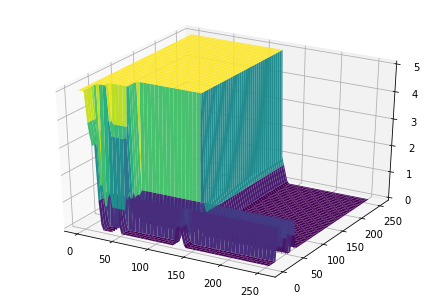

In [ ]:
graficarDampTime3D(1)

## Simulacion Ciclo Heavy DampTime

Streaming output truncated to the last 5000 lines.
Rule8: 22/0
0.0
Rule9: 18/5
0.0
Rule10: 22/5
0.0
DampTime
lom :  0.0
Ymax:  1.0
DryTime
lom :  20.0
Ymax:  1.0
[0.0, 0.0, 0.0, 0.0, 1.0]
[0.0, 0.0, 0.0, 0.0, 1.0]
Heavy
Rule1: 15/5
0.0
Rule2: 20/0
1.0
Rule3: 18/3
0.0
Rule4: 18/0
0.0
Rule5: 5/0
0.0
Rule6: 20/5
0.0
Rule7: 20/3
0.0
Rule8: 22/0
0.0
Rule9: 18/5
0.0
Rule10: 22/5
0.0
DampTime
lom :  0.0
Ymax:  1.0
DryTime
lom :  20.0
Ymax:  1.0
[0.0, 0.0, 0.0, 0.0, 1.0]
[0.0, 0.0, 0.0, 0.0, 1.0]
Heavy
Rule1: 15/5
0.0
Rule2: 20/0
1.0
Rule3: 18/3
0.0
Rule4: 18/0
0.0
Rule5: 5/0
0.0
Rule6: 20/5
0.0
Rule7: 20/3
0.0
Rule8: 22/0
0.0
Rule9: 18/5
0.0
Rule10: 22/5
0.0
DampTime
lom :  0.0
Ymax:  1.0
DryTime
lom :  20.0
Ymax:  1.0
[0.0, 0.0, 0.0, 0.0, 1.0]
[0.0, 0.0, 0.0, 0.0, 1.0]
Heavy
Rule1: 15/5
0.0
Rule2: 20/0
1.0
Rule3: 18/3
0.0
Rule4: 18/0
0.0
Rule5: 5/0
0.0
Rule6: 20/5
0.0
Rule7: 20/3
0.0
Rule8: 22/0
0.0
Rule9: 18/5
0.0
Rule10: 22/5
0.0
DampTime
lom :  0.0
Ymax:  1.0
DryTime
lom :  20.0
Ymax:  1.

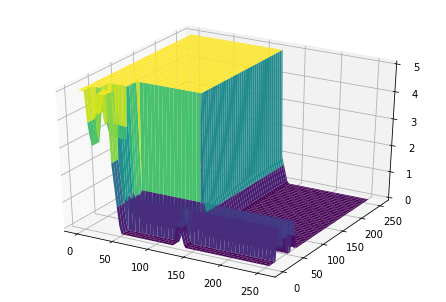

In [ ]:
graficarDampTime3D(0)

## Simulacion Ciclo Heavy Drytime

Streaming output truncated to the last 5000 lines.
Rule8: 22/0
0.0
Rule9: 18/5
0.0
Rule10: 22/5
0.0
DampTime
lom :  0.0
Ymax:  1.0
DryTime
lom :  20.0
Ymax:  1.0
[0.0, 0.0, 0.0, 0.0, 1.0]
[0.0, 0.0, 0.0, 0.0, 1.0]
Heavy
Rule1: 15/5
0.0
Rule2: 20/0
1.0
Rule3: 18/3
0.0
Rule4: 18/0
0.0
Rule5: 5/0
0.0
Rule6: 20/5
0.0
Rule7: 20/3
0.0
Rule8: 22/0
0.0
Rule9: 18/5
0.0
Rule10: 22/5
0.0
DampTime
lom :  0.0
Ymax:  1.0
DryTime
lom :  20.0
Ymax:  1.0
[0.0, 0.0, 0.0, 0.0, 1.0]
[0.0, 0.0, 0.0, 0.0, 1.0]
Heavy
Rule1: 15/5
0.0
Rule2: 20/0
1.0
Rule3: 18/3
0.0
Rule4: 18/0
0.0
Rule5: 5/0
0.0
Rule6: 20/5
0.0
Rule7: 20/3
0.0
Rule8: 22/0
0.0
Rule9: 18/5
0.0
Rule10: 22/5
0.0
DampTime
lom :  0.0
Ymax:  1.0
DryTime
lom :  20.0
Ymax:  1.0
[0.0, 0.0, 0.0, 0.0, 1.0]
[0.0, 0.0, 0.0, 0.0, 1.0]
Heavy
Rule1: 15/5
0.0
Rule2: 20/0
1.0
Rule3: 18/3
0.0
Rule4: 18/0
0.0
Rule5: 5/0
0.0
Rule6: 20/5
0.0
Rule7: 20/3
0.0
Rule8: 22/0
0.0
Rule9: 18/5
0.0
Rule10: 22/5
0.0
DampTime
lom :  0.0
Ymax:  1.0
DryTime
lom :  20.0
Ymax:  1.

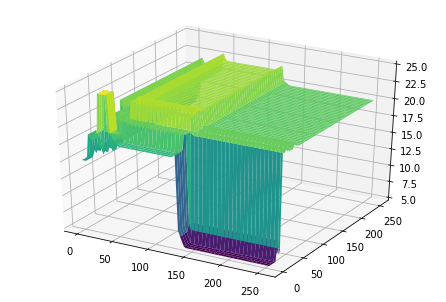

In [ ]:
graficarDryTime3D(0)

## Simulacion Ciclo Normal DryTime

Streaming output truncated to the last 5000 lines.
lom :  1.0
Ymax:  0.6616161616161614
DryTime
lom :  18.6
Ymax:  0.6616161616161614
[0.0, 0.0, 0.44696969696969724, 0.5530303030303028, 0.0]
[0.0, 0.0, 0.0, 0.0, 1.0]
Normal
Rule1: 15/0
0.0
Rule2: 15/5
0.0
Rule3: 18/0
0.5530303030303028
Rule4: 20/5
0.0
Rule5: 18/5
0.0
Rule6: 15/3
0.0
Rule7: 20/3
0.0
Rule8: 25/5
0.0
Rule9: 25/0
0.0
DampTime
lom :  1.3
Ymax:  0.5530303030303028
DryTime
lom :  18.8
Ymax:  0.5530303030303028
[0.0, 0.0, 0.2323232323232324, 0.7676767676767676, 0.0]
[0.0, 0.0, 0.0, 0.0, 1.0]
Normal
Rule1: 15/0
0.0
Rule2: 15/5
0.0
Rule3: 18/0
0.7676767676767676
Rule4: 20/5
0.0
Rule5: 18/5
0.0
Rule6: 15/3
0.0
Rule7: 20/3
0.0
Rule8: 25/5
0.0
Rule9: 25/0
0.0
DampTime
lom :  0.6000000000000001
Ymax:  0.7676767676767676
DryTime
lom :  18.400000000000002
Ymax:  0.7676767676767676
[0.0, 0.0, 0.01767676767676759, 0.9823232323232325, 0.0]
[0.0, 0.0, 0.0, 0.0, 1.0]
Normal
Rule1: 15/0
0.0
Rule2: 15/5
0.0
Rule3: 18/0
0.9823232323232325
Rul

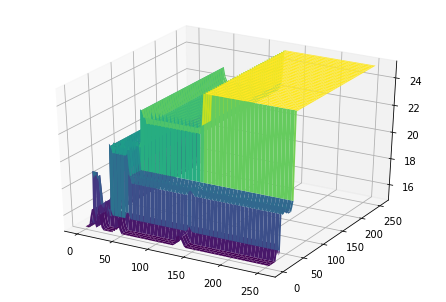

In [ ]:
graficarDryTime3D(1)

### Conclusiones



*   A mayor cantidad de wet hits(Num_2527) y menor cantidad de timepo en donde se deja de detectar wet hits(time 0), mayor sera la cantidad de timepo del damp time, no importa el tipo ciclo.
*   A partir de mas de 50 wet hits y en cualquier cantidad de tiempo en que se deje de detectar wet hits, se tendra un drytime mayor a 20 minutos para el ciclo heavy.
*   A mayor cantidad de wet hits(Num_2527) y mayor cantidad de timepo en donde se deja de detectar wet hits(time0), mayor sera la cantidad de timepo del dry time, en el ciclo normal.

## Referencia de la patente:
  https://patents.google.com/patent/US6446357B2/en

